In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Lectura y limpieza de datos

In [15]:

def abrir_csv(path, **kwargs):
    '''
    Args:
        path (str): Path relativo al archivo csv
    Returns:
        DataFrame
    '''
    df = pd.read_csv(path)
    return df


def guardar_en_csv(df_filtrado, nombre_archivo):
    '''
    Args:
        df_filtrado: DataFrame con las columnas filtradas
        nombre_archivo (str): nombre del archivo de salida en csv
    '''

    df_filtrado.to_csv(nombre_archivo, index=False)



In [16]:
# Proyecto\IMT2200-ProyectoDS\data\mental_health_remote_workers.csv

path = os.path.join('../..', 'data', 'mental_health_remote_workers.csv')
df = pd.read_csv(path)
df.head(20)

,Employee_ID,Name,Age,Gender,Country,Job_Role,Experience_Years,Work_Mode,Hours_Worked_Per_Week,Productivity_Score,Mental_Health_Status,Burnout_Score,Sleep_Hours_Per_Day,Exercise_Frequency,Work_Life_Balance_Rating,Has_Access_To_Therapist,Willing_To_Return_Onsite,Remote_Setup_Satisfaction,Internet_Issues_Frequency,Team_Communication_Effectiveness
0,1,User_1,28,Female,Canada,QA Engineer,5.4,Onsite,45.4,6.6,Poor,44,5.7,Rarely,7.5,True,False,9.9,Sometimes,7.7
1,2,User_2,41,Prefer not to say,Australia,DevOps Engineer,10.5,Remote,40.4,8.4,Good,58,5.1,Daily,8.6,False,True,2.5,Often,9.0
2,3,User_3,36,Male,Germany,UI/UX Designer,11.9,Hybrid,43.6,6.6,Good,78,6.1,Never,6.2,False,False,9.1,Often,7.7
3,4,User_4,32,Prefer not to say,Germany,Product Manager,15.6,Hybrid,41.3,9.0,Moderate,71,5.4,Rarely,8.5,True,True,6.1,Sometimes,8.4
4,5,User_5,29,Male,UK,DevOps Engineer,1.8,Hybrid,42.5,6.9,Poor,69,7.1,Never,6.0,True,True,9.3,Never,4.7
5,6,User_6,42,Female,Brazil,QA Engineer,19.9,Remote,45.0,6.9,Poor,59,8.6,2-3x/Week,2.5,False,False,6.6,Never,8.5
6,7,User_7,28,Non-binary,India,QA Engineer,9.9,Hybrid,37.9,9.1,Moderate,87,4.7,Rarely,5.2,True,False,7.3,Never,2.6
7,8,User_8,47,Male,India,DevOps Engineer,6.3,Hybrid,52.5,5.8,Moderate,84,4.5,Never,6.0,True,True,6.4,Never,9.2
8,9,User_9,40,Prefer not to say,Canada,QA Engineer,17.8,Remote,37.0,3.9,Poor,18,5.3,Never,7.8,False,False,8.9,Often,6.4
9,10,User_10,44,Female,UK,DevOps Engineer,15.2,Onsite,35.9,3.2,Good,43,7.6,2-3x/Week,2.9,True,False,7.9,Often,8.5


In [17]:
columnas_a_eliminas = ['Exercise_Frequency', 'Job_Role', 'Gender', 'Internet_Issues_Frequency', 'Team_Communication_Effectiveness', 'Hours_Worked_Per_Week', 'Productivity_Score', 'Remote_Setup_Satisfaction']
df = df.drop(columns=columnas_a_eliminas)

In [18]:
columnas_traducidas = {
    'Employee_ID': 'ID_Empleado',
    'Name': 'Nombre',
    'Age': 'Edad',
    'Gender': 'Género',
    'Country': 'País',
    'Job_Role': 'Rol_de_Trabajo',
    'Experience_Years': 'Años_de_Experiencia',
    'Work_Mode': 'Ubicación_de_Trabajo',
    'Hours_Worked_Per_Week': 'Horas_Trabajadas_Por_Semana',
    'Productivity_Score': 'Puntaje_de_Productividad',
    'Mental_Health_Status': 'Estado_de_Salud_Mental',
    'Burnout_Score': 'Puntaje_de_Agobio',
    'Sleep_Hours_Per_Day': 'Horas_de_Sueño_Por_Día',
    'Exercise_Frequency': 'Frecuencia_de_Ejercicio',
    'Work_Life_Balance_Rating': 'Calificación_de_Equilibrio_Trabajo_Vida',
    'Has_Access_To_Therapist': 'Acceso_a_Terapeuta',
    'Willing_To_Return_Onsite': 'Disposición_a_Regresar_Presencialmente',
    'Remote_Setup_Satisfaction': 'Satisfacción_con_Configuración_Remota',
    'Internet_Issues_Frequency': 'Frecuencia_de_Problemas_de_Internet',
    'Team_Communication_Effectiveness': 'Eficacia_en_Comunicación_del_Equipo'
}
df.rename(columns=columnas_traducidas, inplace=True)


In [19]:
df

,ID_Empleado,Nombre,Edad,País,Años_de_Experiencia,Ubicación_de_Trabajo,Estado_de_Salud_Mental,Puntaje_de_Agobio,Horas_de_Sueño_Por_Día,Calificación_de_Equilibrio_Trabajo_Vida,Acceso_a_Terapeuta,Disposición_a_Regresar_Presencialmente
0,1,User_1,28,Canada,5.4,Onsite,Poor,44,5.7,7.5,True,False
1,2,User_2,41,Australia,10.5,Remote,Good,58,5.1,8.6,False,True
2,3,User_3,36,Germany,11.9,Hybrid,Good,78,6.1,6.2,False,False
3,4,User_4,32,Germany,15.6,Hybrid,Moderate,71,5.4,8.5,True,True
4,5,User_5,29,UK,1.8,Hybrid,Poor,69,7.1,6.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,User_96,29,UK,11.8,Hybrid,Good,36,5.0,7.2,False,False
96,97,User_97,35,Germany,4.0,Remote,Good,78,6.5,4.9,True,False
97,98,User_98,44,Australia,3.3,Remote,Poor,29,7.0,6.5,False,True
98,99,User_99,49,USA,7.5,Hybrid,Poor,20,5.7,5.8,False,False


In [20]:
df.columns

Index(['ID_Empleado', 'Nombre', 'Edad', 'País', 'Años_de_Experiencia',
       'Ubicación_de_Trabajo', 'Estado_de_Salud_Mental', 'Puntaje_de_Agobio',
       'Horas_de_Sueño_Por_Día', 'Calificación_de_Equilibrio_Trabajo_Vida',
       'Acceso_a_Terapeuta', 'Disposición_a_Regresar_Presencialmente'],
      dtype='object')

In [21]:
# traducir columnas a español
columnas_traducidas = {
    'Employee_ID': 'ID_Empleado',
    'Name' : 'Nombre',
    'Age': 'Edad',
    'Country': 'Pais',
    'Experience_Years': 'Años_Experiencia',
    'Work_Mode': 'Modelo_de_Trabajo',
    'Mental_Health_Status': 'Estado_de_Salud_Mental',
    'Burnout_Score': 'Puntaje_de_Agobio',
    'Sleep_Hours_Per_Day': 'Horas_de_Sueño_Por_Día',
    'Physical_Activity_Level': 'Nivel_de_Actividad_Física',    
    'Work_Life_Balance_Rating': 'Calificación_de_Equilibrio_Trabajo_Vida',
    'Has_Access_To_Therapist': 'Tiene_Acceso_a_Terapeuta',
    'Willing_To_Return_Onsite': 'Dispuesto_a_Regresar_Al_Sitio',
}

df.rename(columns=columnas_traducidas, inplace=True)
df


,ID_Empleado,Nombre,Edad,País,Años_de_Experiencia,Ubicación_de_Trabajo,Estado_de_Salud_Mental,Puntaje_de_Agobio,Horas_de_Sueño_Por_Día,Calificación_de_Equilibrio_Trabajo_Vida,Acceso_a_Terapeuta,Disposición_a_Regresar_Presencialmente
0,1,User_1,28,Canada,5.4,Onsite,Poor,44,5.7,7.5,True,False
1,2,User_2,41,Australia,10.5,Remote,Good,58,5.1,8.6,False,True
2,3,User_3,36,Germany,11.9,Hybrid,Good,78,6.1,6.2,False,False
3,4,User_4,32,Germany,15.6,Hybrid,Moderate,71,5.4,8.5,True,True
4,5,User_5,29,UK,1.8,Hybrid,Poor,69,7.1,6.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,User_96,29,UK,11.8,Hybrid,Good,36,5.0,7.2,False,False
96,97,User_97,35,Germany,4.0,Remote,Good,78,6.5,4.9,True,False
97,98,User_98,44,Australia,3.3,Remote,Poor,29,7.0,6.5,False,True
98,99,User_99,49,USA,7.5,Hybrid,Poor,20,5.7,5.8,False,False


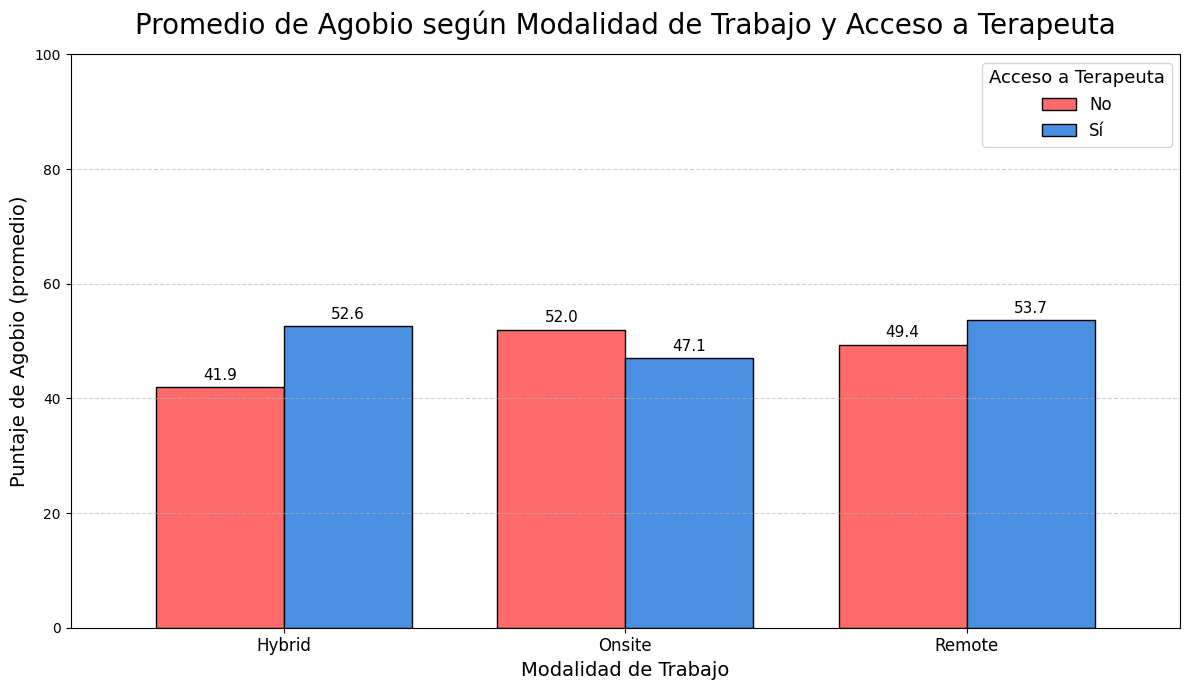

In [22]:
df_temp = df.copy()
df_temp.columns = df_temp.columns.str.strip()

# Calcular el promedio del puntaje de agobio según ubicación y acceso a terapeuta
tabla_agobio = (
    df_temp.groupby(["Ubicación_de_Trabajo", "Acceso_a_Terapeuta"])["Puntaje_de_Agobio"]
    .mean()
    .unstack()
)

# Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 7))
tabla_agobio.plot(
    kind='bar',
    ax=ax,
    edgecolor='black',
    width=0.75,
    color=['#ff6b6b', '#4a90e2']  # Colores rojo (No) y azul (Sí)
)

# Títulos y etiquetas
ax.set_title("Promedio de Agobio según Modalidad de Trabajo y Acceso a Terapeuta", fontsize=20, pad=15)
ax.set_ylabel("Puntaje de Agobio (promedio)", fontsize=14)
ax.set_xlabel("Modalidad de Trabajo", fontsize=14)
ax.set_xticklabels(tabla_agobio.index, rotation=0, fontsize=12)
ax.legend(title="Acceso a Terapeuta", labels=["No", "Sí"], fontsize=12, title_fontsize=13)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=11, padding=3)
plt.ylim(0,100)
plt.tight_layout()
plt.show()

Se eliminará la columna Nombre dado que son anonimos e identificados mediante 'User_x', por lo que es reiterativo mantenerlo si cada uno tiene un ID identificador.

In [23]:
df = df.drop(columns='Nombre')
df

,ID_Empleado,Edad,País,Años_de_Experiencia,Ubicación_de_Trabajo,Estado_de_Salud_Mental,Puntaje_de_Agobio,Horas_de_Sueño_Por_Día,Calificación_de_Equilibrio_Trabajo_Vida,Acceso_a_Terapeuta,Disposición_a_Regresar_Presencialmente
0,1,28,Canada,5.4,Onsite,Poor,44,5.7,7.5,True,False
1,2,41,Australia,10.5,Remote,Good,58,5.1,8.6,False,True
2,3,36,Germany,11.9,Hybrid,Good,78,6.1,6.2,False,False
3,4,32,Germany,15.6,Hybrid,Moderate,71,5.4,8.5,True,True
4,5,29,UK,1.8,Hybrid,Poor,69,7.1,6.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...
95,96,29,UK,11.8,Hybrid,Good,36,5.0,7.2,False,False
96,97,35,Germany,4.0,Remote,Good,78,6.5,4.9,True,False
97,98,44,Australia,3.3,Remote,Poor,29,7.0,6.5,False,True
98,99,49,USA,7.5,Hybrid,Poor,20,5.7,5.8,False,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Empleado                              100 non-null    int64  
 1   Edad                                     100 non-null    int64  
 2   País                                     100 non-null    object 
 3   Años_de_Experiencia                      100 non-null    float64
 4   Ubicación_de_Trabajo                     100 non-null    object 
 5   Estado_de_Salud_Mental                   100 non-null    object 
 6   Puntaje_de_Agobio                        100 non-null    int64  
 7   Horas_de_Sueño_Por_Día                   100 non-null    float64
 8   Calificación_de_Equilibrio_Trabajo_Vida  100 non-null    float64
 9   Acceso_a_Terapeuta                       100 non-null    bool   
 10  Disposición_a_Regresar_Presencialmente   100 non-nu

In [25]:
# eliminas filas con valores nulos
df.dropna(inplace=True)
df

,ID_Empleado,Edad,País,Años_de_Experiencia,Ubicación_de_Trabajo,Estado_de_Salud_Mental,Puntaje_de_Agobio,Horas_de_Sueño_Por_Día,Calificación_de_Equilibrio_Trabajo_Vida,Acceso_a_Terapeuta,Disposición_a_Regresar_Presencialmente
0,1,28,Canada,5.4,Onsite,Poor,44,5.7,7.5,True,False
1,2,41,Australia,10.5,Remote,Good,58,5.1,8.6,False,True
2,3,36,Germany,11.9,Hybrid,Good,78,6.1,6.2,False,False
3,4,32,Germany,15.6,Hybrid,Moderate,71,5.4,8.5,True,True
4,5,29,UK,1.8,Hybrid,Poor,69,7.1,6.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...
95,96,29,UK,11.8,Hybrid,Good,36,5.0,7.2,False,False
96,97,35,Germany,4.0,Remote,Good,78,6.5,4.9,True,False
97,98,44,Australia,3.3,Remote,Poor,29,7.0,6.5,False,True
98,99,49,USA,7.5,Hybrid,Poor,20,5.7,5.8,False,False


# Promedio de salud mental por cada modelo de trabajo

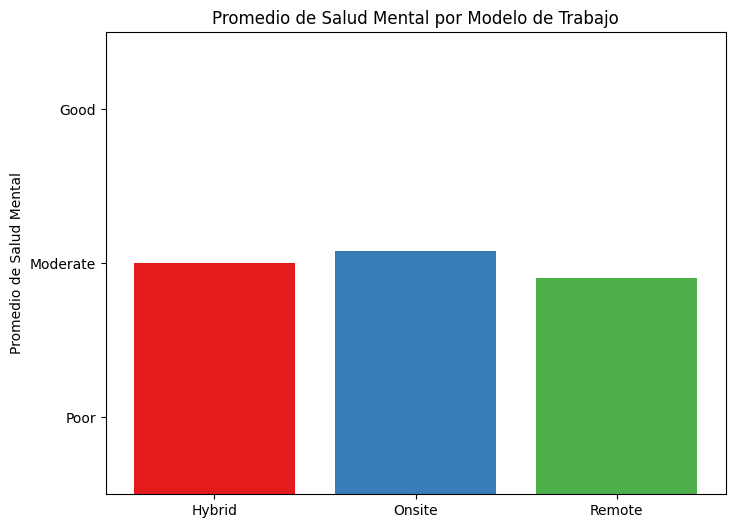

In [26]:
df_temp = df.copy()

# Mapear categorías a números
salud_map = {"Poor": 1, "Moderate": 2, "Good": 3}
df_temp["Salud_Mental_Num"] = df_temp["Estado_de_Salud_Mental"].map(salud_map)

# Agrupar por modelo de trabajo y sacar promedio
promedios = df_temp.groupby("Ubicación_de_Trabajo")["Salud_Mental_Num"].mean()

# Crear gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(promedios.index, promedios.values, color=["#e41a1c", "#377eb8", "#4daf4a"])

# Cambiar eje Y a palabras
plt.ylim(0.5,3.5)  # un poco más de margen arriba y abajo
plt.yticks([1, 2, 3], ["Poor", "Moderate", "Good"])

plt.ylabel("Promedio de Salud Mental")
plt.title("Promedio de Salud Mental por Modelo de Trabajo")
plt.xticks(rotation=0)
plt.show()

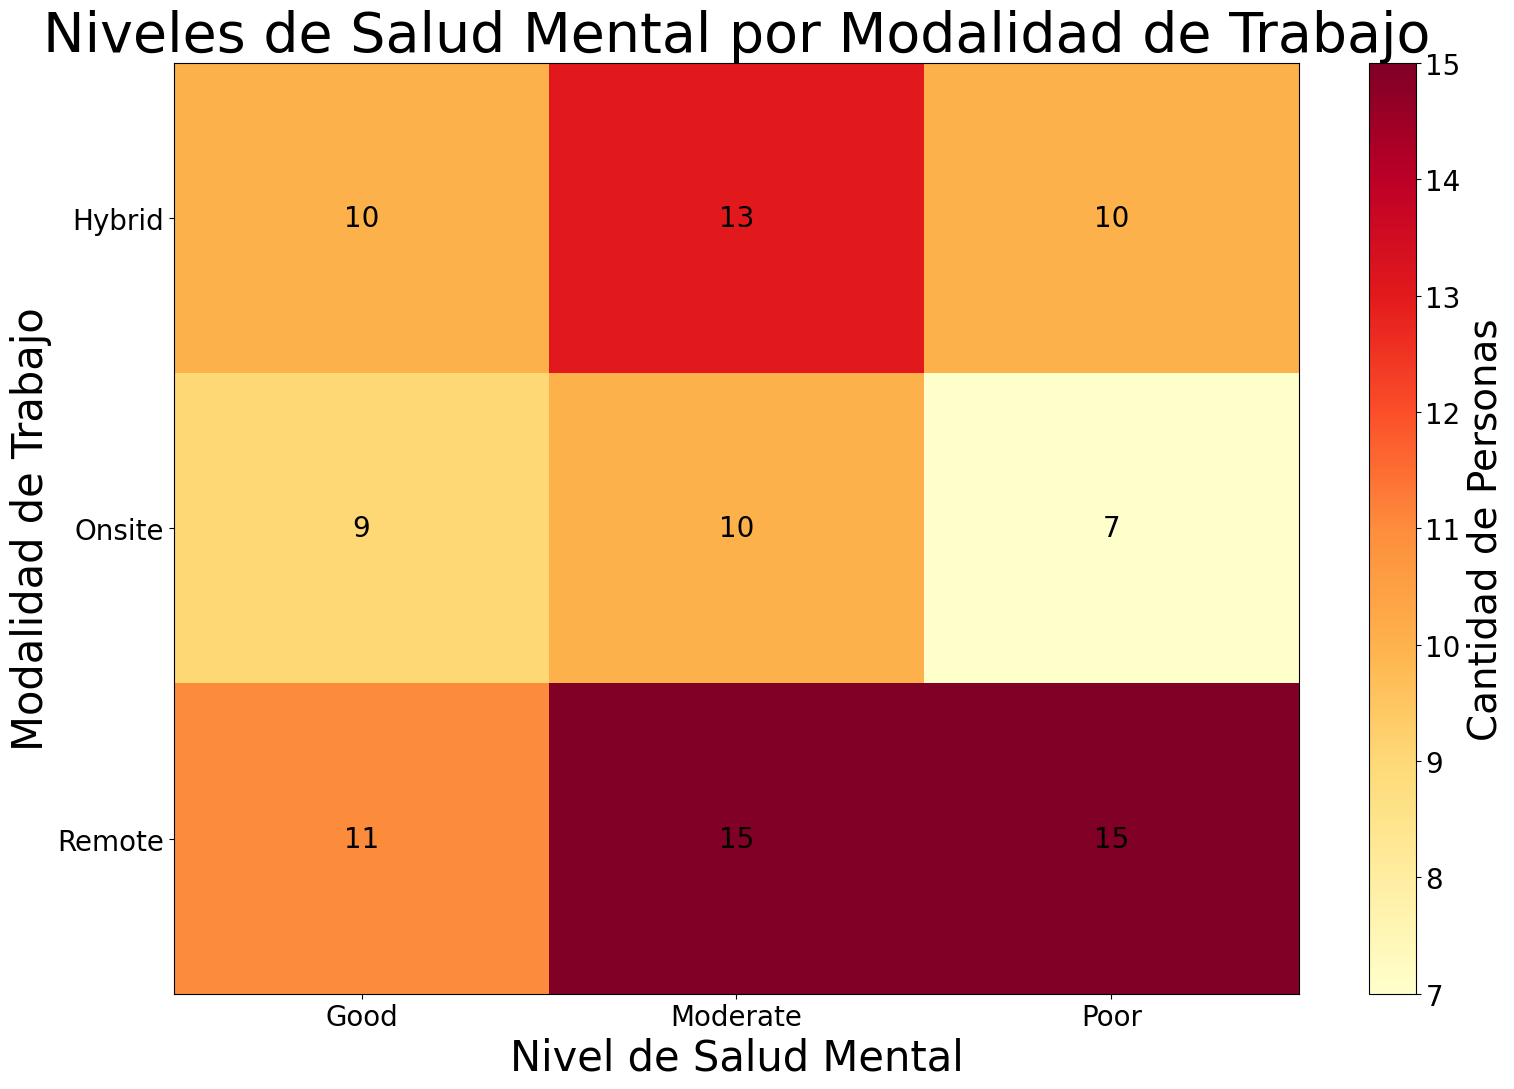

In [27]:
tabla_salud = pd.crosstab(df["Ubicación_de_Trabajo"], df["Estado_de_Salud_Mental"])

# Convertir a matriz
data_matrix = tabla_salud.values
labels_x = tabla_salud.columns
labels_y = tabla_salud.index

# Crear figura
plt.figure(figsize=(16, 11))

# Mostrar el heatmap
im = plt.imshow(data_matrix, cmap="YlOrRd", aspect='auto')

# Mostrar los números en cada celda
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        plt.text(j, i, int(data_matrix[i, j]), ha='center', va='center', color='black', fontsize=20)

# Configurar etiquetas de los ejes
plt.xticks(range(len(labels_x)), labels_x, fontsize=20)
plt.yticks(range(len(labels_y)), labels_y, fontsize=20)

# Títulos y etiquetas
plt.title("Niveles de Salud Mental por Modalidad de Trabajo", fontsize=40)
plt.xlabel("Nivel de Salud Mental", fontsize=30)
plt.ylabel("Modalidad de Trabajo", fontsize=30)

# Barra de color
cbar = plt.colorbar(im)
cbar.set_label("Cantidad de Personas", fontsize=28)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

In [28]:
df

,ID_Empleado,Edad,País,Años_de_Experiencia,Ubicación_de_Trabajo,Estado_de_Salud_Mental,Puntaje_de_Agobio,Horas_de_Sueño_Por_Día,Calificación_de_Equilibrio_Trabajo_Vida,Acceso_a_Terapeuta,Disposición_a_Regresar_Presencialmente
0,1,28,Canada,5.4,Onsite,Poor,44,5.7,7.5,True,False
1,2,41,Australia,10.5,Remote,Good,58,5.1,8.6,False,True
2,3,36,Germany,11.9,Hybrid,Good,78,6.1,6.2,False,False
3,4,32,Germany,15.6,Hybrid,Moderate,71,5.4,8.5,True,True
4,5,29,UK,1.8,Hybrid,Poor,69,7.1,6.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...
95,96,29,UK,11.8,Hybrid,Good,36,5.0,7.2,False,False
96,97,35,Germany,4.0,Remote,Good,78,6.5,4.9,True,False
97,98,44,Australia,3.3,Remote,Poor,29,7.0,6.5,False,True
98,99,49,USA,7.5,Hybrid,Poor,20,5.7,5.8,False,False


# Promedio del equilibrio de la vida y el trabajo por cada modelo de trabajo

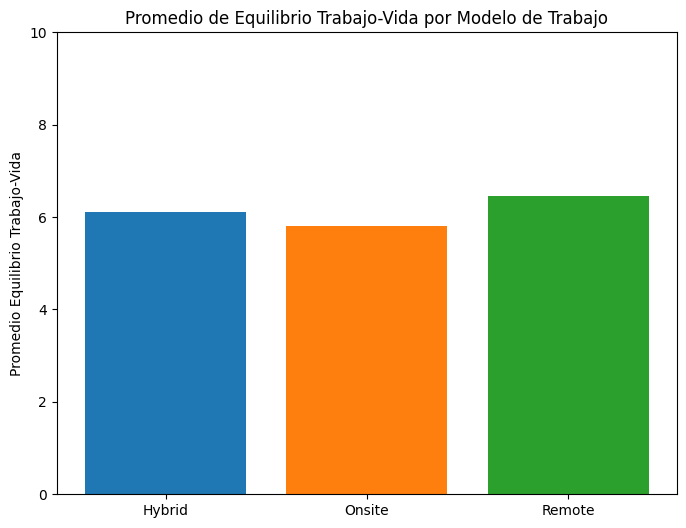

In [29]:
promedios_eq = df_temp.groupby("Ubicación_de_Trabajo")["Calificación_de_Equilibrio_Trabajo_Vida"].mean()

plt.figure(figsize=(8,6))
plt.bar(promedios_eq.index, promedios_eq.values, color=["#1f77b4", "#ff7f0e", "#2ca02c"])  # azul, naranja, verde
plt.ylim(0,10) 
plt.ylabel("Promedio Equilibrio Trabajo-Vida")
plt.title("Promedio de Equilibrio Trabajo-Vida por Modelo de Trabajo")
plt.xticks(rotation=0)
plt.show()

# promedio de agobio en los modelos de trabajo

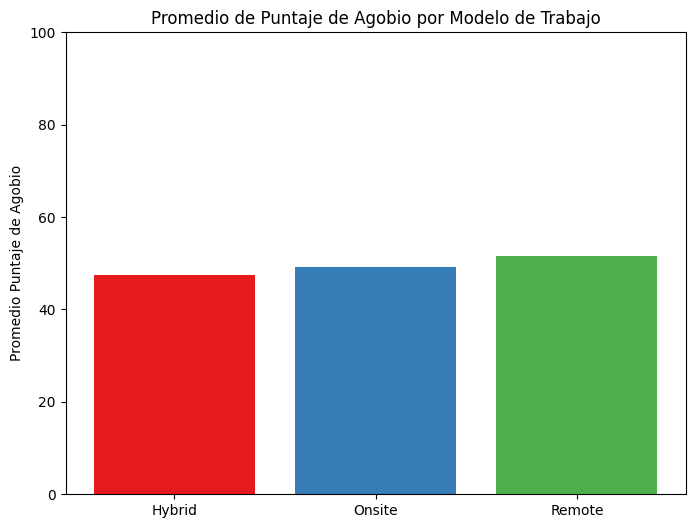

In [30]:

promedios_agobio = df_temp.groupby("Ubicación_de_Trabajo")["Puntaje_de_Agobio"].mean()
plt.figure(figsize=(8,6))
plt.bar(promedios_agobio.index, promedios_agobio.values, color=["#e41a1c", "#377eb8", "#4daf4a"])
plt.ylim(0,100)
plt.ylabel("Promedio Puntaje de Agobio")
plt.title("Promedio de Puntaje de Agobio por Modelo de Trabajo")
plt.xticks(rotation=0)
plt.show()